<a href="https://colab.research.google.com/github/SohelRaja/Customer-Churn-Analysis/blob/master/Ensemble%20Learning/Other%20Classifiers/RANDOM%20FOREST/Random_Forest_Classifier_Customer_Churn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Analysis with Random Forest Classifier #

### Importing Required Libraries ###

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

### Importing Dataset From Github Repository ###

In [3]:
url = 'https://raw.githubusercontent.com/SohelRaja/Customer-Churn-Analysis/master/Decision%20Tree/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco.head(3)

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes

[3 rows x 21 columns]

### Data Analysis ###

In [4]:
telco_arr = np.array(telco.columns)
telco_arr

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
def unique_value_check():
    len_col_telco = len(telco_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(1,len_col_telco):
        val = len(np.unique(telco[telco_arr[i]]))
        print(i," : ",telco_arr[i],":",val,end='\t')
        if(val<10):
            print("---> ",telco[telco_arr[i]].unique().tolist())
        else:
            print("---> [Too Much Values]")
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  gender : 2	--->  ['Female', 'Male']
2  :  SeniorCitizen : 2	--->  [0, 1]
3  :  Partner : 2	--->  ['Yes', 'No']
4  :  Dependents : 2	--->  ['No', 'Yes']
5  :  tenure : 73	---> [Too Much Values]
6  :  PhoneService : 2	--->  ['No', 'Yes']
7  :  MultipleLines : 3	--->  ['No phone service', 'No', 'Yes']
8  :  InternetService : 3	--->  ['DSL', 'Fiber optic', 'No']
9  :  OnlineSecurity : 3	--->  ['No', 'Yes', 'No internet service']
10  :  OnlineBackup : 3	--->  ['Yes', 'No', 'No internet service']
11  :  DeviceProtection : 3	--->  ['No', 'Yes', 'No internet service']
12  :  TechSupport : 3	--->  ['No', 'Yes', 'No internet service']
13  :  StreamingTV : 3	--->  ['No', 'Yes', 'No internet service']
14  :  StreamingMovies : 3	--->  ['No', 'Yes', 'No internet service']
15  :  Contract : 3	--->  ['Month-to-month', 'One year', 'Two year']
16  :  PaperlessBilling : 2	--->  ['Yes', 'No']
17  :  PaymentMethod : 4	--->  ['Electro

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
telco.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

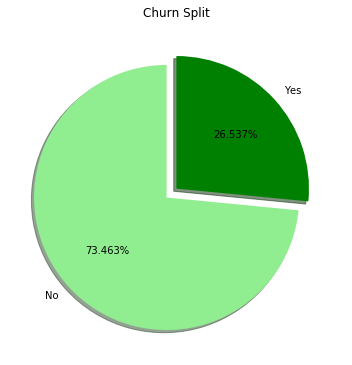

In [8]:
from collections import Counter

labels, values = zip(*Counter(telco["Churn"]).items())
colors = ['lightgreen', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[5, 5])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.3f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

### Data Cleaning ###

In [9]:
df = telco.drop(['customerID','TotalCharges'],axis=1)
df = df.apply(LabelEncoder().fit_transform)
df.head(3)

gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  Churn
0       0              0        1  ...              2             142      0
1       1              0        0  ...              3             498      0
2       1              0        0  ...              3             436      1

[3 rows x 19 columns]

### Data Preprocessing, & Feature Importance ###

In [0]:
#Spliting df to features data and target data
X = df.iloc[:,:-1]
y = df[["Churn"]]

In [0]:
#Spliting of Training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
#scaling the data
scaler = StandardScaler()
SS_X_train = scaler.fit_transform(X_train)
SS_X_test = scaler.fit_transform(X_test)

### Training of the model with the help of CART(Gini Index) Algorithm

In [31]:
# accuracy in different level for gini index
list_accuracy = []
for i in range(1,25):
  rfc_g_l = RandomForestClassifier(criterion='gini',max_depth=i,n_estimators=200)
  rfc_g_l.fit(SS_X_train,y_train)
  predictions_l = rfc_g_l.predict(SS_X_test)
  acc_gini_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_gini_l)
  print("Accuracy: {} % for depth= {}".format(acc_gini_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 77.30496453900709 % for depth= 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 78.86524822695036 % for depth= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.71631205673759 % for depth= 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.85106382978722 % for depth= 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.84397163120568 % for depth= 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.99290780141844 % for depth= 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.27659574468085 % for depth= 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.71631205673759 % for depth= 14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.43262411347519 % for depth= 19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.71631205673759 % for depth= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 24

Maximum Accuracy is 81.84397163120568 % for depth= 8


In [32]:
rfc_g = RandomForestClassifier(criterion='gini',max_depth=8,n_estimators=200)
rfc_g.fit(SS_X_train,y_train)
predictions = rfc_g.predict(SS_X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [33]:
important_gini = rfc_g.feature_importances_
important_f_gini = pd.Series(important_gini, X.columns[:])
important_f_gini.sort_values(ascending=False, inplace=True)
important_f_gini

tenure              0.217526
Contract            0.185926
MonthlyCharges      0.126961
OnlineSecurity      0.110605
TechSupport         0.080854
InternetService     0.058237
PaymentMethod       0.042421
OnlineBackup        0.038686
DeviceProtection    0.023961
PaperlessBilling    0.021861
MultipleLines       0.015694
StreamingMovies     0.013374
SeniorCitizen       0.012942
gender              0.011661
Partner             0.011460
StreamingTV         0.011314
Dependents          0.010856
PhoneService        0.005660
dtype: float64

In [34]:
cla_gini = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_gini)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.92      0.88       511
           1       0.72      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.78      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [35]:
con_gini = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_gini)

Confusion matrix:

 [[472  39]
 [ 94 100]]


In [36]:
acc_gini = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_gini,"%")

Accuracy: 81.13475177304964 %


### Training of the model with the help of ID3(Entropy) Algorithm

In [25]:
# accuracy in different level for entropy
list_accuracy = []
for i in range(1,25):
  rfc_e_l = RandomForestClassifier(criterion='entropy',max_depth=i,n_estimators=200)
  rfc_e_l.fit(SS_X_train,y_train)
  predictions_l = rfc_e_l.predict(SS_X_test)
  acc_entropy_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_entropy_l)
  print("Accuracy: {} % for depth= {}".format(acc_entropy_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 72.4822695035461 % for depth= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 75.46099290780141 % for depth= 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 78.58156028368795 % for depth= 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.1418439716312 % for depth= 4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 81.13475177304964 % for depth= 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.42553191489363 % for depth= 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.99290780141844 % for depth= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.56737588652483 % for depth= 10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.28368794326242 % for depth= 11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.56737588652483 % for depth= 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.99290780141844 % for depth= 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.29078014184398 % for depth= 16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.0 % for depth= 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.8581560283688 % for depth= 19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.14893617021276 % for depth= 20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.70921985815603 % for depth= 21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.85106382978722 % for depth= 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 79.57446808510639 % for depth= 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 80.28368794326242 % for depth= 24

Maximum Accuracy is 81.13475177304964 % for depth= 6


In [26]:
rfc_e = RandomForestClassifier(criterion='entropy',max_depth=6,n_estimators=200)
rfc_e.fit(SS_X_train,y_train)
predictions = rfc_e.predict(SS_X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [27]:
important_entropy = rfc_e.feature_importances_
important_f_entropy = pd.Series(important_entropy, X.columns[:])
important_f_entropy.sort_values(ascending=False, inplace=True)
important_f_entropy

Contract            0.261881
tenure              0.194843
OnlineSecurity      0.129158
MonthlyCharges      0.095393
TechSupport         0.084697
InternetService     0.065401
OnlineBackup        0.033628
PaymentMethod       0.028970
DeviceProtection    0.026274
PaperlessBilling    0.019690
StreamingMovies     0.011469
StreamingTV         0.010628
MultipleLines       0.009300
SeniorCitizen       0.008581
Dependents          0.007066
Partner             0.006103
gender              0.004080
PhoneService        0.002839
dtype: float64

In [28]:
cla_entropy = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_entropy)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       511
           1       0.74      0.51      0.60       194

    accuracy                           0.81       705
   macro avg       0.78      0.72      0.74       705
weighted avg       0.81      0.81      0.80       705



In [29]:
con_entropy = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_entropy)

Confusion matrix:

 [[476  35]
 [ 96  98]]


In [39]:
acc_entropy = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_entropy,"%")

Accuracy: 81.13475177304964 %
